In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import tree 
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import json

In [2]:
data = pd.read_csv('datasets/train_dataset.csv')
data.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0     0               -1.0                         -1  2020-08-04 04:07:56   
1     0               -1.0                         -1  2020-08-04 01:47:40   
2     0               -1.0                         -1  2020-08-04 16:54:31   
3     0               -1.0                         -1  2020-08-03 20:34:28   
4     0               -1.0                         -1  2020-08-03 20:54:17   

   nb_clicks_1week  product_price                 product_age_group  \
0               -1            0.0                                -1   
1               -1            0.0                                -1   
2               -1            0.0  4C90FD52FC53D2C1C205844CB69575AB   
3               -1            0.0                                -1   
4             1064            0.0  4C90FD52FC53D2C1C205844CB69575AB   

                        device_type audience_id  \
0  7E56C27BFF0305E788DA55A029EC4988          -1   
1  7E56C27BFF0305E788DA55A029EC4988          -1   
2  FF2C446555E3822B0E0FC3406116E86D          -1   
3  D7D1FB49049702BF6338894757E0D959          -1   
4  7E56C27BFF0305E788DA55A029EC4988          -1   

                     product_gender  ...               product_category(3)  \
0                                -1  ...                                -1   
1                                -1  ...                                -1   
2  C45A9AC6D102ACAEEDF0D6F78636D84A  ...                                -1   
3                                -1  ...                                -1   
4  1B491180398E2F0390E6A588B3BCE291  ...  1E629AECC2FB9BEF43331CBE8F2D7C08   

                product_category(4) product_category(5) product_category(6)  \
0                                -1                  -1                  -1   
1                                -1                  -1                  -1   
2                                -1                  -1                  -1   
3                                -1                  -1                  -1   
4  341C9BD18A3277E6B104CAFC177DE796                  -1                  -1   

  product_category(7)                   product_country  \
0                  -1  57A1D462A03BD076E029CF9310C11FC5   
1                  -1  57A1D462A03BD076E029CF9310C11FC5   
2                  -1  2AC62132FBCFA093B9426894A4BC6278   
3                  -1  57A1D462A03BD076E029CF9310C11FC5   
4                  -1  989EEF92F2A525DD896557425EA7C4C7   

                         product_id  \
0  B69E439E41E0BEAD764ABF16D7FD96C9   
1  404D3D9D03297504F3509032DCFA02F0   
2  B09E51338E0EED59C5A859B13631C370   
3  080614393A57816D7A655695E2DBE728   
4  350271BAFD7C7AAF6FB1424CF3DD4827   

                                       product_title  \
0                                                 -1   
1                                                 -1   
2  3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...   
3                                                 -1   
4  097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...   

                         partner_id                           user_id  
0  E3DDEB04F8AFF944B11943BB57D2F620  5E2C678F6586B67F61A377E1534E01FC  
1  E3DDEB04F8AFF944B11943BB57D2F620  E8247702C0DD294E0AE6B5B5E2F9E810  
2  12E43E51784BDE3CB9E0EF6310A7D5C5  9FD001258907F541D497040C64383696  
3  E3DDEB04F8AFF944B11943BB57D2F620  225741ACF2DBB2E5948268F5D5D352E6  
4  F0FD783189F55BAFC331AD347EAE6863  160A90377E54124D0BD31DB6735F0B33  

[5 rows x 23 columns]

In [3]:
df = data.replace([-1,'-1'],np.nan)
df['click_timestamp'].replace(['0',0],np.nan,inplace=True)
df['product_price'].replace(['0',0],np.nan,inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sale                       100000 non-null  float64
 1   SalesAmountInEuro          13661 non-null   float64
 2   time_delay_for_conversion  13606 non-null   float64
 3   click_timestamp            100000 non-null  object 
 4   nb_clicks_1week            53940 non-null   float64
 5   product_price              12784 non-null   float64
 6   product_age_group          24397 non-null   object 
 7   device_type                99961 non-null   object 
 8   audience_id                28207 non-null   object 
 9   product_gender             24446 non-null   object 
 10  product_brand              34200 non-null   object 
 11  product_category(1)        54498 non-null   object 
 12  product_category(2)        54483 non-null   object 
 13  product_category(3)        476

In [4]:
print("Number of Null rows : ")
print(df.isnull().sum())

Number of Null rows : 
Sale                              0
SalesAmountInEuro             86339
time_delay_for_conversion     86394
click_timestamp                   0
nb_clicks_1week               46060
product_price                 87216
product_age_group             75603
device_type                      39
audience_id                   71793
product_gender                75554
product_brand                 65800
product_category(1)           45502
product_category(2)           45517
product_category(3)           52316
product_category(4)           71222
product_category(5)           92009
product_category(6)           98832
product_category(7)          100000
product_country               23754
product_id                    23714
product_title                 45763
partner_id                        0
user_id                           0
dtype: int64


In [5]:
print("Number of unique values : ")
print(df.nunique())

Number of unique values : 
Sale                             2
SalesAmountInEuro             8931
time_delay_for_conversion     9207
click_timestamp              67045
nb_clicks_1week               1137
product_price                 4495
product_age_group                8
device_type                      3
audience_id                   3181
product_gender                  10
product_brand                 4769
product_category(1)             21
product_category(2)            144
product_category(3)            698
product_category(4)            909
product_category(5)            441
product_category(6)             88
product_category(7)              0
product_country                 16
product_id                   45446
product_title                27694
partner_id                     183
user_id                      96766
dtype: int64


In [6]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0                NaN                        NaN  2020-08-04 04:07:56   
1   0.0                NaN                        NaN  2020-08-04 01:47:40   
2   0.0                NaN                        NaN  2020-08-04 16:54:31   
3   0.0                NaN                        NaN  2020-08-03 20:34:28   
4   0.0                NaN                        NaN  2020-08-03 20:54:17   

   nb_clicks_1week  product_price                 product_age_group  \
0              NaN            NaN                               NaN   
1              NaN            NaN                               NaN   
2              NaN            NaN  4C90FD52FC53D2C1C205844CB69575AB   
3              NaN            NaN                               NaN   
4           1064.0            NaN  4C90FD52FC53D2C1C205844CB69575AB   

                        device_type audience_id  \
0  7E56C27BFF0305E788DA55A029EC4988         NaN   
1  7E56C27BFF0305E788DA55A029EC4988         NaN   
2  FF2C446555E3822B0E0FC3406116E86D         NaN   
3  D7D1FB49049702BF6338894757E0D959         NaN   
4  7E56C27BFF0305E788DA55A029EC4988         NaN   

                     product_gender  ...               product_category(3)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2  C45A9AC6D102ACAEEDF0D6F78636D84A  ...                               NaN   
3                               NaN  ...                               NaN   
4  1B491180398E2F0390E6A588B3BCE291  ...  1E629AECC2FB9BEF43331CBE8F2D7C08   

                product_category(4) product_category(5) product_category(6)  \
0                               NaN                 NaN                 NaN   
1                               NaN                 NaN                 NaN   
2                               NaN                 NaN                 NaN   
3                               NaN                 NaN                 NaN   
4  341C9BD18A3277E6B104CAFC177DE796                 NaN                 NaN   

  product_category(7)                   product_country  \
0                 NaN  57A1D462A03BD076E029CF9310C11FC5   
1                 NaN  57A1D462A03BD076E029CF9310C11FC5   
2                 NaN  2AC62132FBCFA093B9426894A4BC6278   
3                 NaN  57A1D462A03BD076E029CF9310C11FC5   
4                 NaN  989EEF92F2A525DD896557425EA7C4C7   

                         product_id  \
0  B69E439E41E0BEAD764ABF16D7FD96C9   
1  404D3D9D03297504F3509032DCFA02F0   
2  B09E51338E0EED59C5A859B13631C370   
3  080614393A57816D7A655695E2DBE728   
4  350271BAFD7C7AAF6FB1424CF3DD4827   

                                       product_title  \
0                                                NaN   
1                                                NaN   
2  3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...   
3                                                NaN   
4  097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...   

                         partner_id                           user_id  
0  E3DDEB04F8AFF944B11943BB57D2F620  5E2C678F6586B67F61A377E1534E01FC  
1  E3DDEB04F8AFF944B11943BB57D2F620  E8247702C0DD294E0AE6B5B5E2F9E810  
2  12E43E51784BDE3CB9E0EF6310A7D5C5  9FD001258907F541D497040C64383696  
3  E3DDEB04F8AFF944B11943BB57D2F620  225741ACF2DBB2E5948268F5D5D352E6  
4  F0FD783189F55BAFC331AD347EAE6863  160A90377E54124D0BD31DB6735F0B33  

[5 rows x 23 columns]

<AxesSubplot:>

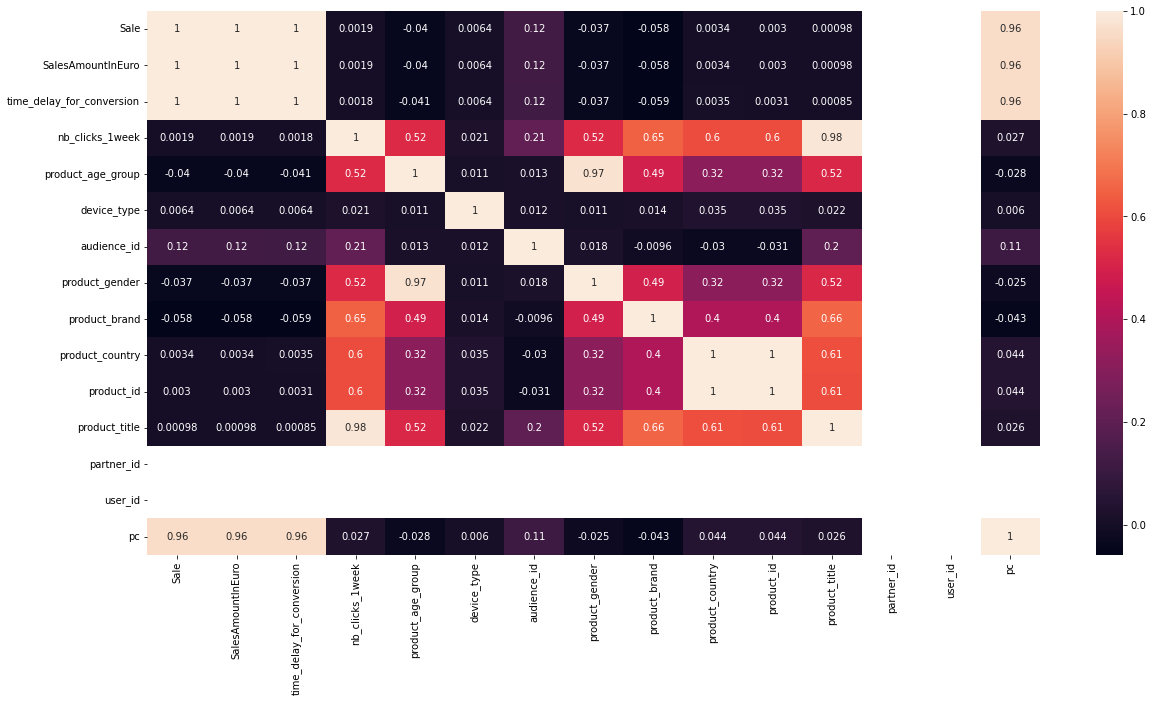

In [7]:
col = df["product_price"]
df["pc"] = col
nan = df.isna()
nan = nan.drop(columns=['product_category(1)', 'product_category(2)',
       'product_category(3)', 'product_category(4)', 'product_category(5)',
       'product_category(6)', 'product_category(7)',"product_price",'click_timestamp'])
nan["Sale"] = df["Sale"].apply(lambda x : not x)
fig = plt.figure(figsize=(20,10))
sns.heatmap(nan.corr(),annot=True)

In [8]:
# plot pie charts 
def pie_plot(column,df):    
    sale = df[df["Sale"] == 1]
    not_sale = df[df["Sale"] == 0]
    fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                      subplot_titles=['sale', 'not-sale'])

    fig.add_trace(go.Pie(values  = sale[column].value_counts().values.tolist(),
                  labels  = sale[column].value_counts().keys().tolist(),
                  hoverinfo = "label+percent+name",
                  domain = dict(x = [0,.48]),
                  name = "sale customers",
                  marker_colors = [ 'orange' , 'steelblue','forestgreen' ],
                  hole = .5 ))

    fig.add_trace(go.Pie(values  = not_sale[column].value_counts().values.tolist(),
                  labels  = not_sale[column].value_counts().keys().tolist(),
                  hoverinfo = "label+percent+name",
                  domain  = dict(x = [.52,1]),                
                  name    = "not sale customers",
                  hole    = .5))

    fig.update_layout(
      plot_bgcolor  = "rgb(243,243,243)",
      paper_bgcolor = "rgb(243,243,243)",
      title_text="plot of sale and not-sale people by "+column,
      annotations=[dict(text='not-sale', x=0.75, y=0.5, font_size=20, showarrow=False),
                  dict(text='sale', x=0.25, y=0.5, font_size=20, showarrow=False)])

    py.iplot(fig)
    fig = px.pie(df, values=df[column].value_counts().values.tolist(),names=df[column].value_counts().keys().tolist())
    fig.show()
def sale_relation(col,df):
    sale = df[df["Sale"] == 1][[col,"Sale"]].astype(int)
    not_sale = df[df["Sale"] == 0][[col,"Sale"]].astype(int)
    not_sale["Sale"] = not_sale["Sale"].apply(lambda x : not x) 
    new_df = sale.groupby(col)["Sale"].sum()
    fig = plt.figure(figsize=(20,10))
    y = new_df.to_numpy()
    plt.plot(range(len(y)),y)
    plt.title(f"Sale - {col} relation")
    plt.show()
    new_df = not_sale.groupby(col)["Sale"].sum()
    y = new_df.to_numpy()
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(len(y)),y)
    plt.title(f"not Sale - {col} relation")
    plt.show()
    
    
    

In [9]:
col = df["time_delay_for_conversion"].notnull()
df["time_delay"] = col
pie_plot('time_delay',df)

In [10]:
col = df["SalesAmountInEuro"].notnull()
df["SalesAmount"] = col
pie_plot('SalesAmount',df)

In [11]:
col = df["product_price"].replace(0,np.nan).notnull()
df["pc"] = col
pie_plot('pc',df)

In [12]:
def reverse_nan(d1,d2):
    try:
        nan_num = d1[np.nan]
        r = d2[0]
        d1[np.nan] = 0
        d1[r] = nan_num
        d2[0] = np.nan
        d2[nan_num] = r
    except:
        size = len(d1)
        r = d2[0]
        d1[np.nan] = 0
        d1[r] = size
        d2[0] = np.nan
        d2[size] = r
        
    
    

In [13]:
# product age group 
col = df["product_age_group"]
product_age_group_list = col.unique()
product_age_group_hash_table = dict()
product_age_group_hash_table_reverse = dict()
for i,group in enumerate(product_age_group_list):
    product_age_group_hash_table[group] = i
    product_age_group_hash_table_reverse[i] = group
reverse_nan(product_age_group_hash_table,product_age_group_hash_table_reverse)
print(product_age_group_hash_table,product_age_group_hash_table_reverse)
col = col.apply(lambda x :product_age_group_hash_table[x]).astype("category");
nul = product_age_group_hash_table[np.nan]
#col.replace()
df["product_age_group"] = col
pie_plot('product_age_group',df)

{nan: 0, '4C90FD52FC53D2C1C205844CB69575AB': 1, '921B36149E5B081FD24450BFE2CE4430': 2, '3FEC071EF6B3D061D8804E0522FF4D2A': 3, 'E7BD5A29457B8E92582951B586319A9C': 4, '88460293E9517D21E39AA889BD5AADC8': 5, '0CD76C7030D0900BE250C8D41703D180': 6, '538912C31E773613AB51FBAE58492476': 7, 'D72D7E92251E4C54C786FDEFFA4DEF5A': 8} {0: nan, 1: '4C90FD52FC53D2C1C205844CB69575AB', 2: '921B36149E5B081FD24450BFE2CE4430', 3: '3FEC071EF6B3D061D8804E0522FF4D2A', 4: 'E7BD5A29457B8E92582951B586319A9C', 5: '88460293E9517D21E39AA889BD5AADC8', 6: '0CD76C7030D0900BE250C8D41703D180', 7: '538912C31E773613AB51FBAE58492476', 8: 'D72D7E92251E4C54C786FDEFFA4DEF5A'}


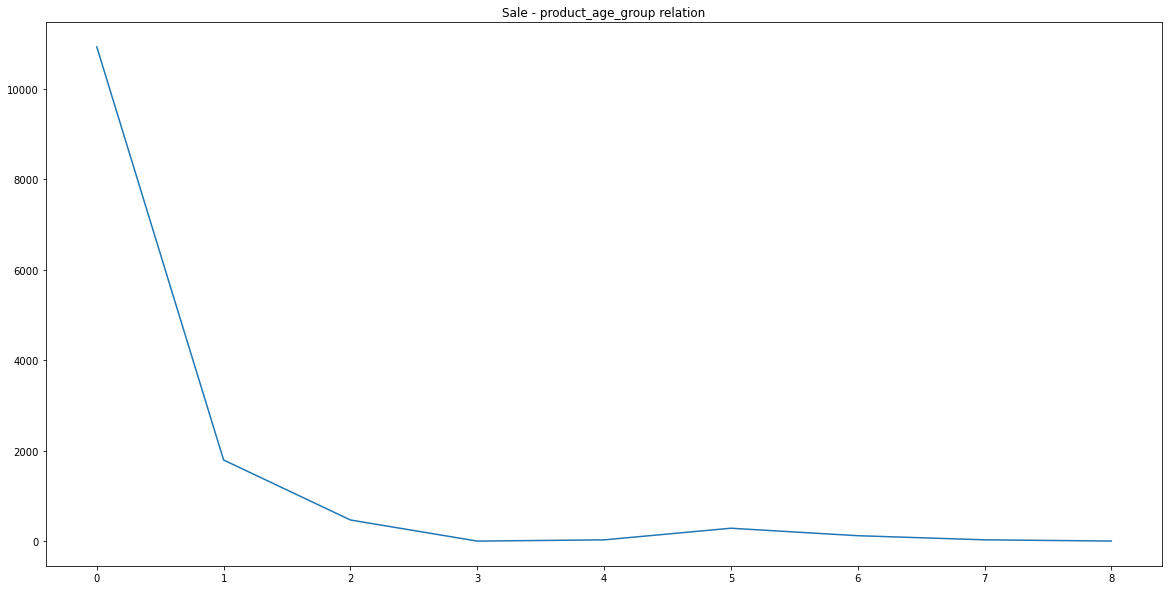

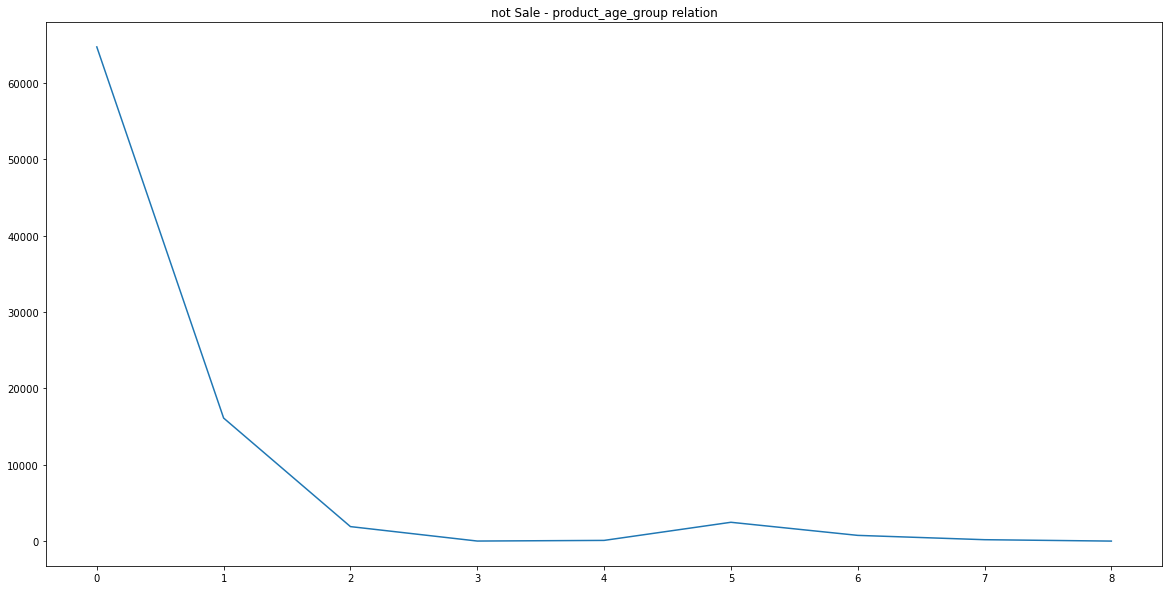

In [14]:
sale_relation("product_age_group",df)

In [15]:
# device_type
col = df["device_type"]
device_type_list = col.unique()
device_type_hash_table = dict()
device_type_hash_table_reverse = dict()
for i,group in enumerate(device_type_list):
    device_type_hash_table[group] = i
    device_type_hash_table_reverse[i] = group
reverse_nan(device_type_hash_table,device_type_hash_table_reverse)
print(device_type_hash_table,device_type_hash_table_reverse)
col = col.apply(lambda x :device_type_hash_table[x]).astype("category");
df["device_type"] = col
pie_plot('device_type',df)
df["device_type"].unique()

{'7E56C27BFF0305E788DA55A029EC4988': 3, 'FF2C446555E3822B0E0FC3406116E86D': 1, 'D7D1FB49049702BF6338894757E0D959': 2, nan: 0} {0: nan, 1: 'FF2C446555E3822B0E0FC3406116E86D', 2: 'D7D1FB49049702BF6338894757E0D959', 3: '7E56C27BFF0305E788DA55A029EC4988'}


[3, 1, 2, 0]
Categories (4, int64): [0, 1, 2, 3]

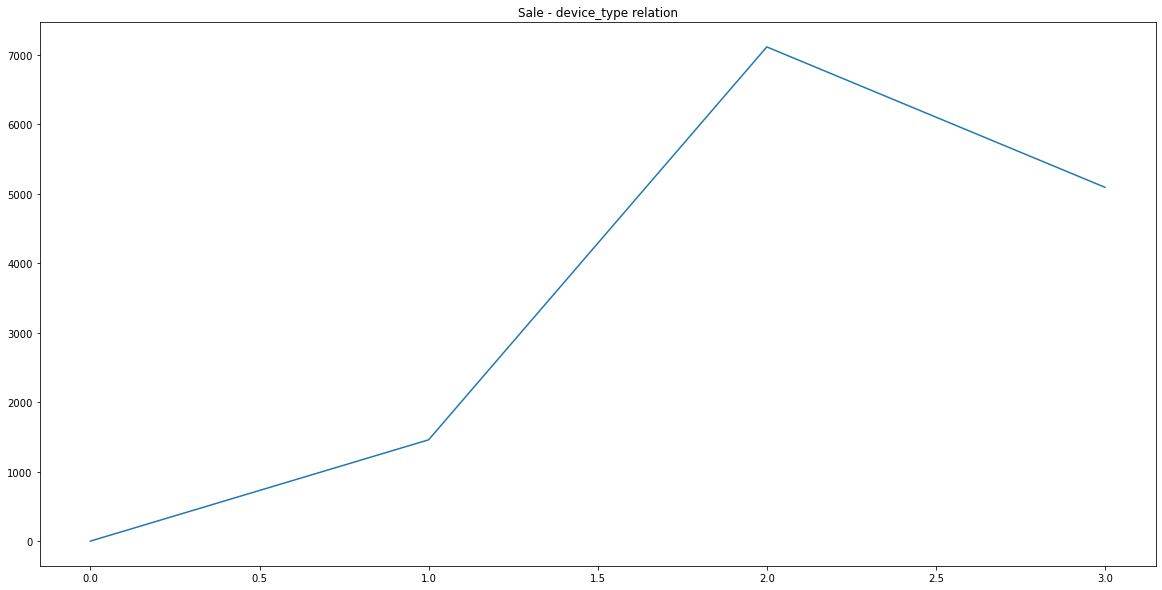

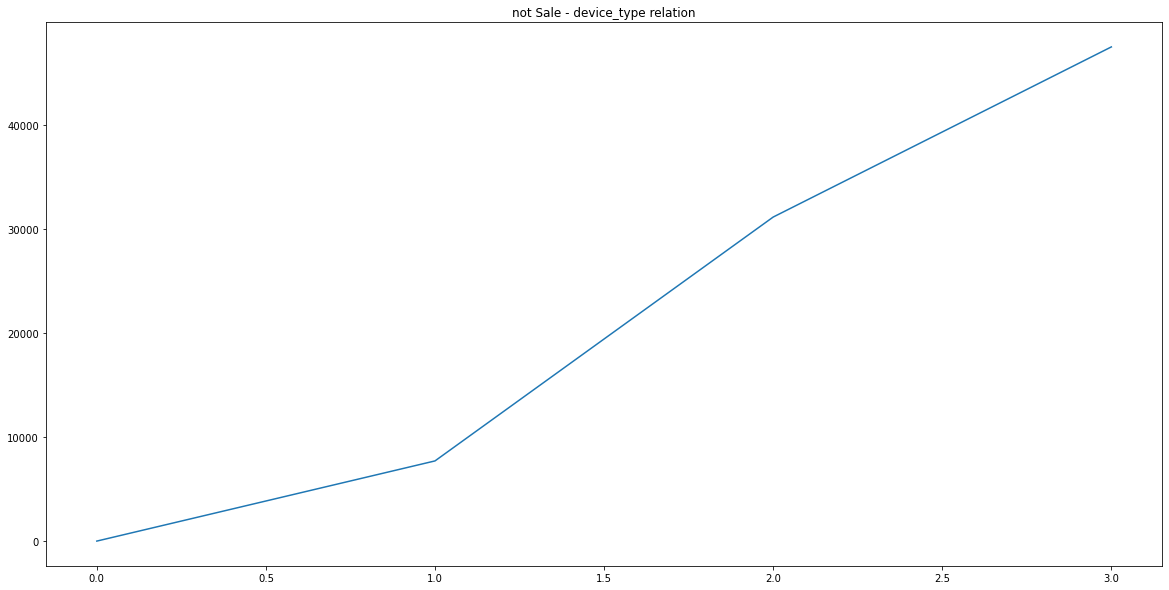

In [16]:
sale_relation("device_type",df)

In [17]:
# product_country
col = df["product_country"]
product_country_list = col.unique()
product_country_hash_table = dict()
product_country_hash_table_reverse = dict()
for i,group in enumerate(product_country_list):
    product_country_hash_table[group] = i
    product_country_hash_table_reverse[i] = group
reverse_nan(product_country_hash_table,product_country_hash_table_reverse)
print(product_country_hash_table,product_country_hash_table_reverse)
col = col.apply(lambda x :product_country_hash_table[x]).astype("category");
df["product_country"] = col
pie_plot('product_country',df)

{'57A1D462A03BD076E029CF9310C11FC5': 3, '2AC62132FBCFA093B9426894A4BC6278': 1, '989EEF92F2A525DD896557425EA7C4C7': 2, nan: 0, 'D963E3BCE149E71F5D5E3000DCF68A9F': 4, 'B1D897877EBD2BCE4A722DF0581CDAF5': 5, 'B74153C05E08C5657699F356BFDB2D85': 6, 'A5B2C360D0724A75CDB046D64D30ACAD': 7, 'F0C08A161AA0404193A7EF78F5C3E06C': 8, '2D272B47B9F6C9A9690C783C6ACA8E8D': 9, '1891ECB8C7C09755B33266AFD614660A': 10, 'DE706337A6260D3C92FB07341E9C48A5': 11, 'D8BAE0DF7EDB963C5F3A37A22311705A': 12, 'D12ABFD80E8B026DA7D56377F588093B': 13, '706D09EEA6B6EA9A3DD3EAE236428B6B': 14, '4A3E87E6152F02C52A014D0846726558': 15, 'B8E45AC35500A8A97A62A57B9B8B3CC8': 16} {0: nan, 1: '2AC62132FBCFA093B9426894A4BC6278', 2: '989EEF92F2A525DD896557425EA7C4C7', 3: '57A1D462A03BD076E029CF9310C11FC5', 4: 'D963E3BCE149E71F5D5E3000DCF68A9F', 5: 'B1D897877EBD2BCE4A722DF0581CDAF5', 6: 'B74153C05E08C5657699F356BFDB2D85', 7: 'A5B2C360D0724A75CDB046D64D30ACAD', 8: 'F0C08A161AA0404193A7EF78F5C3E06C', 9: '2D272B47B9F6C9A9690C783C6ACA8E8D', 

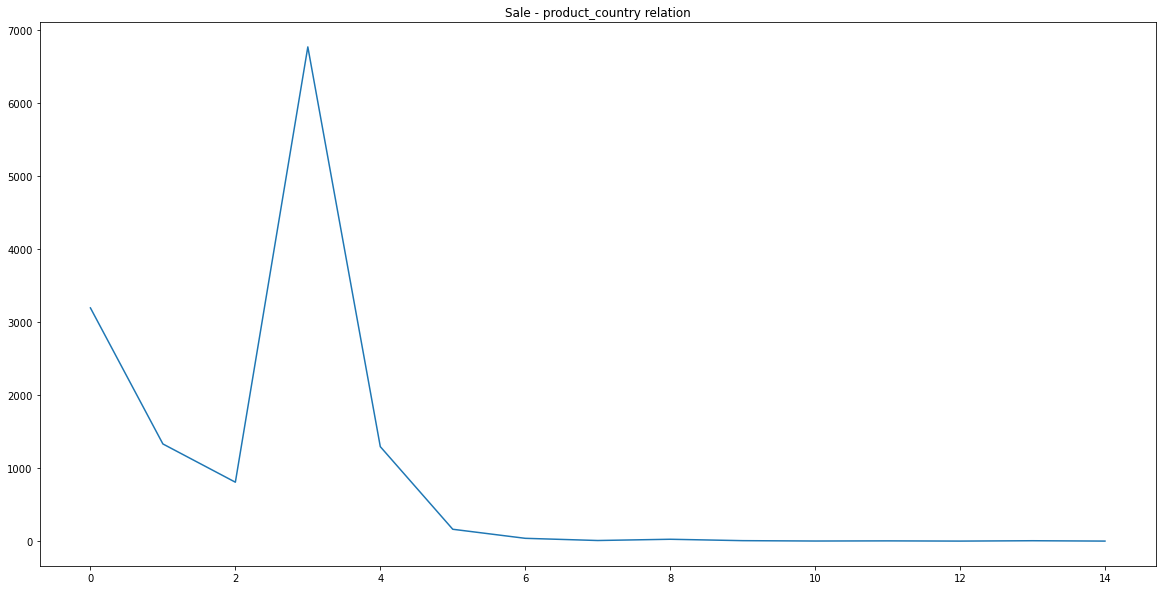

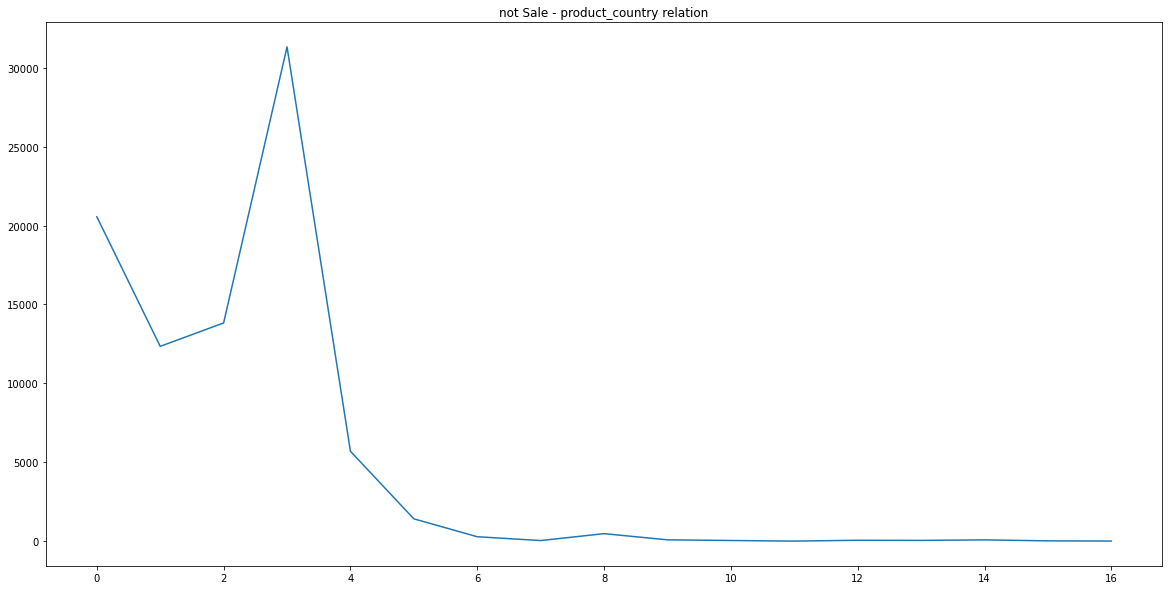

In [18]:
sale_relation("product_country",df)

In [19]:
# product_gender
col = df["product_gender"]
product_gender_list = col.unique()
product_gender_hash_table = dict()
product_gender_hash_table_reverse = dict()
for i,group in enumerate(product_gender_list):
    product_gender_hash_table[group] = i
    product_gender_hash_table_reverse[i] = group
reverse_nan(product_gender_hash_table,product_gender_hash_table_reverse)
print(product_gender_hash_table,product_gender_hash_table_reverse)
col = col.apply(lambda x :product_gender_hash_table[x]).astype("category");
df["product_gender"] = col
pie_plot('product_gender',df)

{nan: 0, 'C45A9AC6D102ACAEEDF0D6F78636D84A': 1, '1B491180398E2F0390E6A588B3BCE291': 2, 'A5D15FC386510762EC0DDFF54ABE6F94': 3, '28F311FA00BD3B4D076659D87EE3AE8D': 4, '6EFABCEDA36A931DBF760F88970BAF0E': 5, 'D7B42B0C4D807EF1C13F79948743E9DA': 6, '86E2AFBF909EC95B069893FF0BBC5B26': 7, '26FE89E9DD2E6FC18AA5BE1F6D5A6870': 8, 'D894202FD3ABAE0B55F9FAE133412DE5': 9, '0FB06F1EAC1E00A436B336C5DF3C14AF': 10} {0: nan, 1: 'C45A9AC6D102ACAEEDF0D6F78636D84A', 2: '1B491180398E2F0390E6A588B3BCE291', 3: 'A5D15FC386510762EC0DDFF54ABE6F94', 4: '28F311FA00BD3B4D076659D87EE3AE8D', 5: '6EFABCEDA36A931DBF760F88970BAF0E', 6: 'D7B42B0C4D807EF1C13F79948743E9DA', 7: '86E2AFBF909EC95B069893FF0BBC5B26', 8: '26FE89E9DD2E6FC18AA5BE1F6D5A6870', 9: 'D894202FD3ABAE0B55F9FAE133412DE5', 10: '0FB06F1EAC1E00A436B336C5DF3C14AF'}


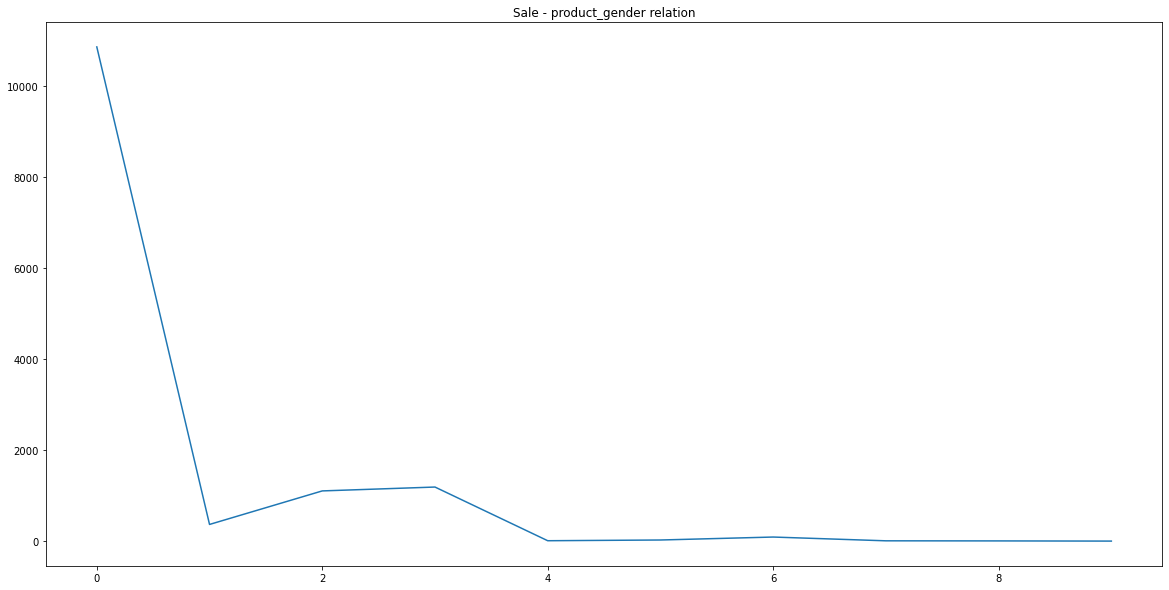

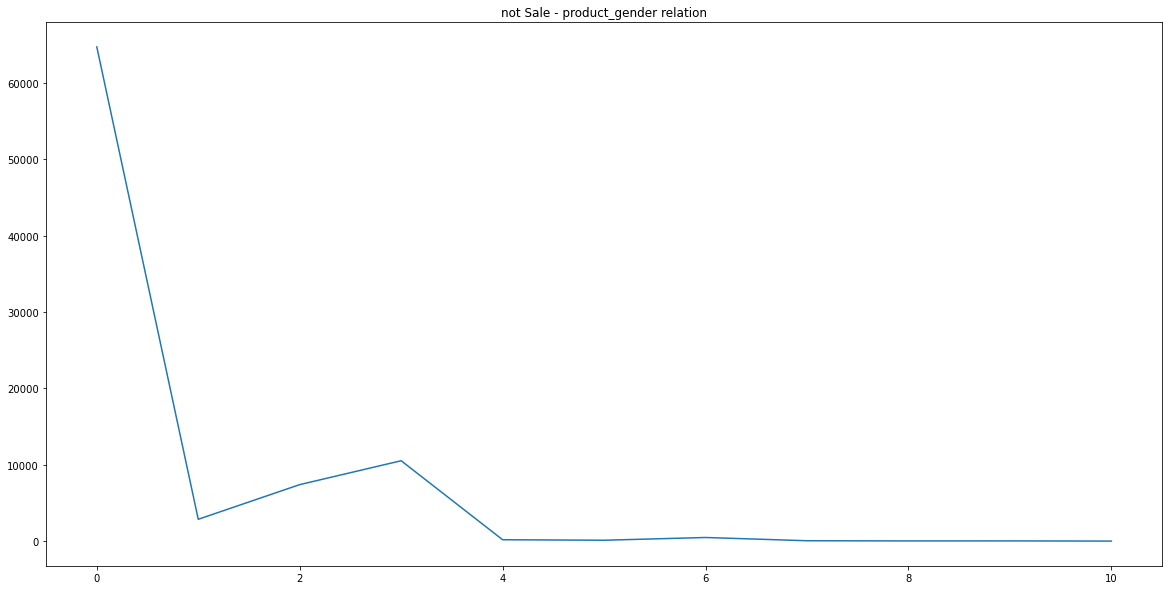

In [20]:
sale_relation("product_gender",df)

In [21]:
#click_timestamp
col = df["click_timestamp"]
time = []
day = []
col.apply(lambda x : day.append(x.split(" ")[0]))
col.apply(lambda x : time.append(x.split(" ")[1]))
df["day"] = pd.Series(day)
df["day_time"] = pd.Series(time)
print(df["day"].unique())
print(len(df["day_time"].unique()))
pie_plot('day',df)
df["day_time_category"] = df["day_time"].apply(lambda x : 1+ int(x.split(":")[0])).astype("category")


['2020-08-04' '2020-08-03']
58023


In [22]:
pie_plot('day_time_category',df)

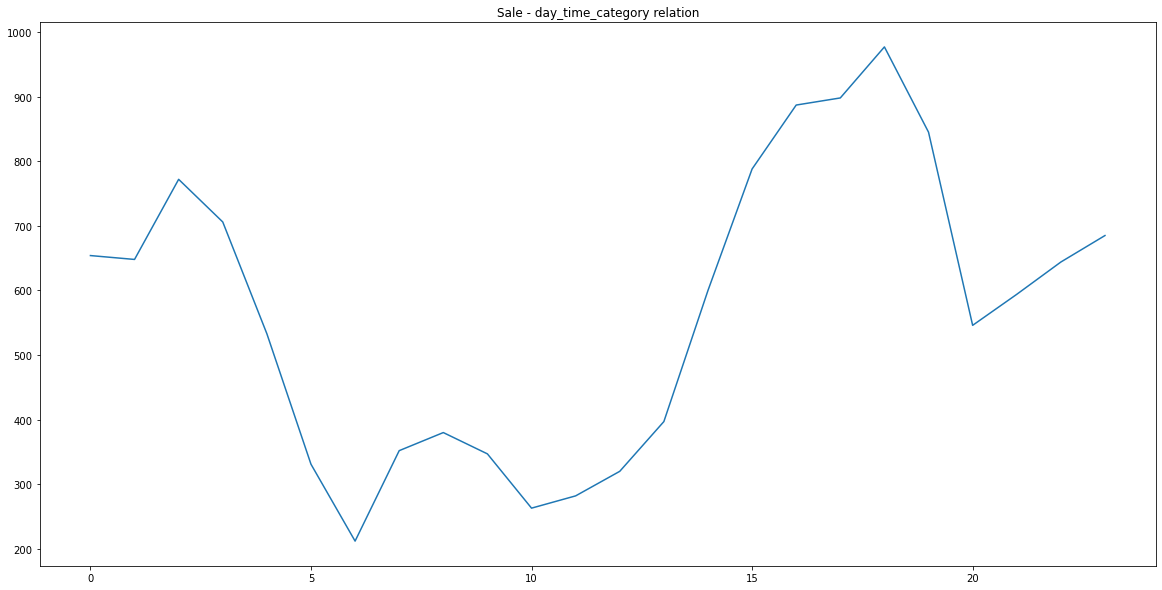

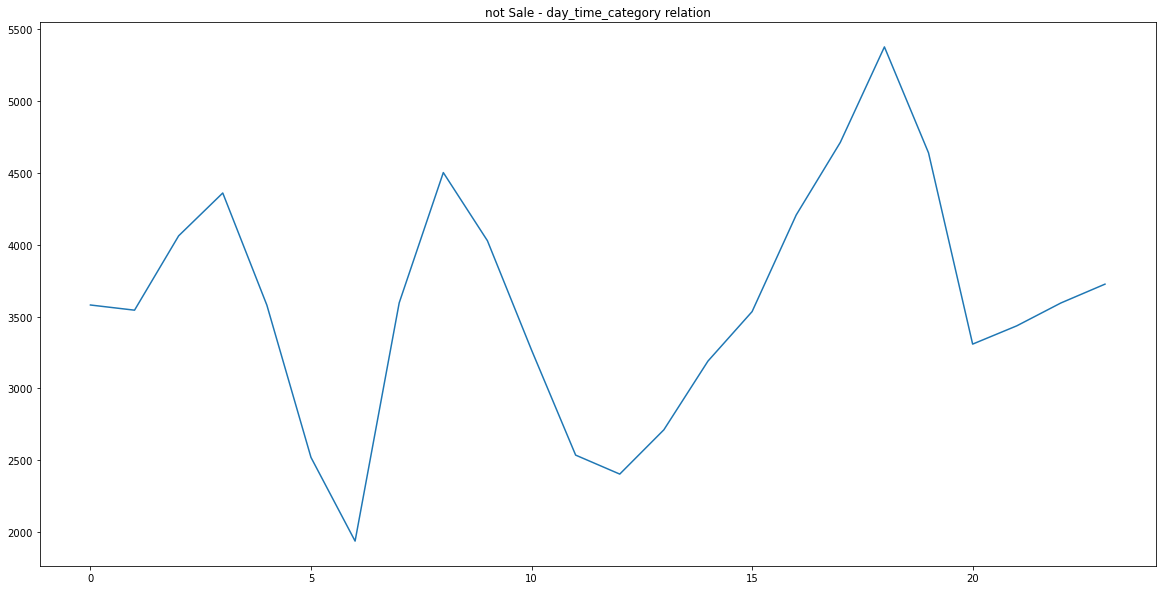

In [23]:
sale_relation('day_time_category',df)

In [24]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0                NaN                        NaN  2020-08-04 04:07:56   
1   0.0                NaN                        NaN  2020-08-04 01:47:40   
2   0.0                NaN                        NaN  2020-08-04 16:54:31   
3   0.0                NaN                        NaN  2020-08-03 20:34:28   
4   0.0                NaN                        NaN  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              NaN            NaN                 0           3         NaN   
1              NaN            NaN                 0           3         NaN   
2              NaN            NaN                 1           1         NaN   
3              NaN            NaN                 0           2         NaN   
4           1064.0            NaN                 1           3         NaN   

  product_gender  ...                        product_id  \
0              0  ...  B69E439E41E0BEAD764ABF16D7FD96C9   
1              0  ...  404D3D9D03297504F3509032DCFA02F0   
2              1  ...  B09E51338E0EED59C5A859B13631C370   
3              0  ...  080614393A57816D7A655695E2DBE728   
4              2  ...  350271BAFD7C7AAF6FB1424CF3DD4827   

                                       product_title  \
0                                                NaN   
1                                                NaN   
2  3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...   
3                                                NaN   
4  097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...   

                         partner_id                           user_id     pc  \
0  E3DDEB04F8AFF944B11943BB57D2F620  5E2C678F6586B67F61A377E1534E01FC  False   
1  E3DDEB04F8AFF944B11943BB57D2F620  E8247702C0DD294E0AE6B5B5E2F9E810  False   
2  12E43E51784BDE3CB9E0EF6310A7D5C5  9FD001258907F541D497040C64383696  False   
3  E3DDEB04F8AFF944B11943BB57D2F620  225741ACF2DBB2E5948268F5D5D352E6  False   
4  F0FD783189F55BAFC331AD347EAE6863  160A90377E54124D0BD31DB6735F0B33  False   

  time_delay SalesAmount         day  day_time day_time_category  
0      False       False  2020-08-04  04:07:56                 5  
1      False       False  2020-08-04  01:47:40                 2  
2      False       False  2020-08-04  16:54:31                17  
3      False       False  2020-08-03  20:34:28                21  
4      False       False  2020-08-03  20:54:17                21  

[5 rows x 29 columns]

In [25]:
# product_brand
col = df["product_brand"]
product_brand_list = col.unique()
product_brand_hash_table = dict()
product_brand_hash_table_reverse = dict()
for i,group in enumerate(product_brand_list):
    product_brand_hash_table[group] = i
    product_brand_hash_table_reverse[i] = group
reverse_nan(product_brand_hash_table,product_brand_hash_table_reverse)
col = col.apply(lambda x :product_brand_hash_table[x]).astype("category");
df["product_brand"] = col
# product_title
col = df["product_title"]
product_title_list = col.unique()
product_title_hash_table = dict()
product_title_hash_table_reverse = dict()
for i,group in enumerate(product_title_list):
    product_title_hash_table[group] = i
    product_title_hash_table_reverse[i] = group
reverse_nan(product_title_hash_table,product_title_hash_table_reverse)
col = col.apply(lambda x :product_title_hash_table[x]).astype("category");
df["product_title"] = col
# audience_id
col = df["audience_id"]
audience_id_list = col.unique()
audience_id_hash_table = dict()
audience_id_hash_table_reverse = dict()
for i,group in enumerate(audience_id_list):
    audience_id_hash_table[group] = i
    audience_id_hash_table_reverse[i] = group
reverse_nan(audience_id_hash_table,audience_id_hash_table_reverse)
col = col.apply(lambda x :audience_id_hash_table[x]).astype("category");
df["audience_id"] = col
# partner_id
col = df["partner_id"]
partner_id_list = col.unique()
partner_id_hash_table = dict()
partner_id_hash_table_reverse = dict()
for i,group in enumerate(partner_id_list):
    partner_id_hash_table[group] = i
    partner_id_hash_table_reverse[i] = group
reverse_nan(partner_id_hash_table,partner_id_hash_table_reverse)
col = col.apply(lambda x :partner_id_hash_table[x]).astype("category");
df["partner_id"] = col
# user_id
col = df["user_id"]
user_id_list = col.unique()
user_id_hash_table = dict()
user_id_hash_table_reverse = dict()
for i,group in enumerate(user_id_list):
    user_id_hash_table[group] = i
    user_id_hash_table_reverse[i] = group
reverse_nan(user_id_hash_table,user_id_hash_table_reverse)
col = col.apply(lambda x :user_id_hash_table[x]).astype("category");
df["user_id"] = col
# product_id
col = df["product_id"]
product_id_list = col.unique()
product_id_hash_table = dict()
product_id_hash_table_reverse = dict()
for i,group in enumerate(product_id_list):
    product_id_hash_table[group] = i
    product_id_hash_table_reverse[i] = group
reverse_nan(product_id_hash_table,product_id_hash_table_reverse)
col = col.apply(lambda x :product_id_hash_table[x]).astype("category");
df["product_id"] = col


In [26]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0                NaN                        NaN  2020-08-04 04:07:56   
1   0.0                NaN                        NaN  2020-08-04 01:47:40   
2   0.0                NaN                        NaN  2020-08-04 16:54:31   
3   0.0                NaN                        NaN  2020-08-03 20:34:28   
4   0.0                NaN                        NaN  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              NaN            NaN                 0           3           0   
1              NaN            NaN                 0           3           0   
2              NaN            NaN                 1           1           0   
3              NaN            NaN                 0           2           0   
4           1064.0            NaN                 1           3           0   

  product_gender  ... product_id product_title partner_id user_id     pc  \
0              0  ...          7             0        183   96766  False   
1              0  ...          1             0        183       1  False   
2              1  ...          2             1          1       2  False   
3              0  ...          3             0        183       3  False   
4              2  ...          4             2          2       4  False   

  time_delay SalesAmount         day  day_time day_time_category  
0      False       False  2020-08-04  04:07:56                 5  
1      False       False  2020-08-04  01:47:40                 2  
2      False       False  2020-08-04  16:54:31                17  
3      False       False  2020-08-03  20:34:28                21  
4      False       False  2020-08-03  20:54:17                21  

[5 rows x 29 columns]

In [27]:
mapping_dict = dict()
mapping_dict["product_age_group"] = [product_age_group_hash_table,product_age_group_hash_table_reverse]
mapping_dict["device_type"] = [device_type_hash_table,device_type_hash_table_reverse]
mapping_dict["product_gender"] = [product_gender_hash_table,product_gender_hash_table_reverse]
mapping_dict["product_brand"] = [product_brand_hash_table,product_brand_hash_table_reverse]
mapping_dict["product_country"] = [product_country_hash_table,product_country_hash_table_reverse]
mapping_dict["product_title"] = [product_title_hash_table,product_title_hash_table_reverse]
mapping_dict["audience_id"] = [audience_id_hash_table,audience_id_hash_table_reverse]
mapping_dict["partner_id"] = [partner_id_hash_table,partner_id_hash_table_reverse]
mapping_dict["user_id"] = [user_id_hash_table,user_id_hash_table_reverse]
mapping_dict["product_id"] = [product_id_hash_table,product_id_hash_table_reverse]

In [28]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0                NaN                        NaN  2020-08-04 04:07:56   
1   0.0                NaN                        NaN  2020-08-04 01:47:40   
2   0.0                NaN                        NaN  2020-08-04 16:54:31   
3   0.0                NaN                        NaN  2020-08-03 20:34:28   
4   0.0                NaN                        NaN  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              NaN            NaN                 0           3           0   
1              NaN            NaN                 0           3           0   
2              NaN            NaN                 1           1           0   
3              NaN            NaN                 0           2           0   
4           1064.0            NaN                 1           3           0   

  product_gender  ... product_id product_title partner_id user_id     pc  \
0              0  ...          7             0        183   96766  False   
1              0  ...          1             0        183       1  False   
2              1  ...          2             1          1       2  False   
3              0  ...          3             0        183       3  False   
4              2  ...          4             2          2       4  False   

  time_delay SalesAmount         day  day_time day_time_category  
0      False       False  2020-08-04  04:07:56                 5  
1      False       False  2020-08-04  01:47:40                 2  
2      False       False  2020-08-04  16:54:31                17  
3      False       False  2020-08-03  20:34:28                21  
4      False       False  2020-08-03  20:54:17                21  

[5 rows x 29 columns]

In [29]:
cat_columns = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand'
, 'product_country', 'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)', 
 'product_category(5)',  'product_category(6)']
product_category_cols = [ 'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)', 
 'product_category(5)',  'product_category(6)']

In [30]:
df[product_category_cols] = df[product_category_cols].fillna(0)

In [31]:
df[product_category_cols].head()

product_category(1)               product_category(2)  \
0                                 0                                 0   
1                                 0                                 0   
2  033E492229C2222EFAA16EE8A6462D8B  CD599E5A946D00A81A875E085F7EF1E8   
3                                 0                                 0   
4  13C26D10258053889D75D9B9CA922EC7  346AC0DECB71FFDC9114236B419D7814   

                product_category(3)               product_category(4)  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4  1E629AECC2FB9BEF43331CBE8F2D7C08  341C9BD18A3277E6B104CAFC177DE796   

  product_category(5) product_category(6)  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0

In [32]:
cat_dict = dict()
for cat in product_category_cols:
    col = df[cat]
    llist = col.unique()
    llist_hash_table = dict()
    llist_hash_table_reverse = dict()
    for i,group in enumerate(llist):
        llist_hash_table[group] = i
        llist_hash_table_reverse[i] = group
    reverse_nan(llist_hash_table,llist_hash_table_reverse)
    col = col.apply(lambda x :llist_hash_table[x]).astype("category");
    df[cat] = col
    cat_dict[cat] = [llist_hash_table,llist_hash_table_reverse]
mapping_dict["category_dicts"] = cat_dict

In [33]:
id_type = 0
class category_tree:
    def __init__(self,num):
        global id_type
        self.type = num
        self.id = id_type
        id_type = id_type+1
        self.child = dict()
    def add_child(self,childrens : list,index):
        if len(childrens) <= index:
            return 
        temp = self.child.get(childrens[index],None)
        if temp == None:
            temp = self.child[childrens[index]] = category_tree(self.type+1)
        temp.add_child(childrens,index+1)
    def get_id(self,childrens : list,index,max_depth = 7,depth_iter = 0):
        if len(childrens) <= index or depth_iter+1 > max_depth :
            return self.id
        else:
            return self.child.get(childrens[index]).get_id(childrens,index+1,max_depth,depth_iter+1)
    """
    def __dict__(self):
        temp = ""
        for key,val in self.child.items():
            temp += f'{key} : {val.__dict__}'
            print(temp)
        return f'\{\"type\": {self.type}, \"id\": {self.id}, \"child\": \{{temp}\}\}'
    """
cols = df[product_category_cols].to_numpy()
node = category_tree(0)
for row in cols:
    node.add_child(row,0)
        
            
            
        

In [34]:
for depth in range(7):
    a = []
    for row in cols:
        a.append(node.get_id(row,0,depth))
    a = pd.Series(a)
    print(f'max_depth {depth} : path {len(a.unique())}')

max_depth 0 : path 1
max_depth 1 : path 22
max_depth 2 : path 147
max_depth 3 : path 736
max_depth 4 : path 1423
max_depth 5 : path 1731
max_depth 6 : path 1784


In [35]:
a = []
for row in cols:
    a.append(node.get_id(row,0))
a = pd.Series(a)
df["tree_encode"] = a

In [36]:
df["tree_encode"].value_counts()

6       45502
12       3844
24       3253
407      1344
57       1106
        ...  
4694        1
4692        1
4678        1
4652        1
5843        1
Name: tree_encode, Length: 1784, dtype: int64

In [37]:
df[product_category_cols].to_csv("utils/category_tree.csv")

In [38]:
df[product_category_cols].head()

product_category(1) product_category(2) product_category(3)  \
0                  22                 145                 699   
1                  22                 145                 699   
2                   1                   1                 699   
3                  22                 145                 699   
4                   2                   2                   1   

  product_category(4) product_category(5) product_category(6)  
0                 910                 442                  89  
1                 910                 442                  89  
2                 910                 442                  89  
3                 910                 442                  89  
4                   1                 442                  89

In [39]:
new_col = df[product_category_cols].astype(bool)
new_col = new_col.astype(int)

In [40]:
col = new_col["product_category(1)"]
for i in range(2,7):
    col = col+(2**(i-1))* new_col[f"product_category({i})"]

In [41]:
df["category_encode"] = col.astype("category")
df

Sale  SalesAmountInEuro  time_delay_for_conversion  \
0       0.0                NaN                        NaN   
1       0.0                NaN                        NaN   
2       0.0                NaN                        NaN   
3       0.0                NaN                        NaN   
4       0.0                NaN                        NaN   
...     ...                ...                        ...   
99995   0.0                NaN                        NaN   
99996   0.0                NaN                        NaN   
99997   1.0           10.15916                      942.0   
99998   0.0                NaN                        NaN   
99999   0.0                NaN                        NaN   

           click_timestamp  nb_clicks_1week  product_price product_age_group  \
0      2020-08-04 04:07:56              NaN            NaN                 0   
1      2020-08-04 01:47:40              NaN            NaN                 0   
2      2020-08-04 16:54:31              NaN            NaN                 1   
3      2020-08-03 20:34:28              NaN            NaN                 0   
4      2020-08-03 20:54:17           1064.0            NaN                 1   
...                    ...              ...            ...               ...   
99995  2020-08-03 20:44:49              NaN            NaN                 0   
99996  2020-08-03 17:42:28              NaN            NaN                 0   
99997  2020-08-04 08:25:11            169.0            3.0                 0   
99998  2020-08-04 03:14:28             30.0            NaN                 0   
99999  2020-08-04 08:00:07            182.0            NaN                 1   

      device_type audience_id product_gender  ... partner_id user_id     pc  \
0               3           0              0  ...        183   96766  False   
1               3           0              0  ...        183       1  False   
2               1           0              1  ...          1       2  False   
3               2           0              0  ...        183       3  False   
4               3           0              2  ...          2       4  False   
...           ...         ...            ...  ...        ...     ...    ...   
99995           3           0              0  ...         57   96761  False   
99996           2           0              0  ...        104   96762  False   
99997           3         936              0  ...          6   96763   True   
99998           2          34              0  ...        183   96764  False   
99999           3           0              3  ...          3   96765  False   

      time_delay SalesAmount         day  day_time  day_time_category  \
0          False       False  2020-08-04  04:07:56                  5   
1          False       False  2020-08-04  01:47:40                  2   
2          False       False  2020-08-04  16:54:31                 17   
3          False       False  2020-08-03  20:34:28                 21   
4          False       False  2020-08-03  20:54:17                 21   
...          ...         ...         ...       ...                ...   
99995      False       False  2020-08-03  20:44:49                 21   
99996      False       False  2020-08-03  17:42:28                 18   
99997       True        True  2020-08-04  08:25:11                  9   
99998      False       False  2020-08-04  03:14:28                  4   
99999      False       False  2020-08-04  08:00:07                  9   

      tree_encode category_encode  
0               6              63  
1               6              63  
2              12              63  
3               6              63  
4              18              63  
...           ...             ...  
99995           6              63  
99996           6              63  
99997         236              63  
99998          52              63  
99999          24              63  

[100000 rows x 31 columns]

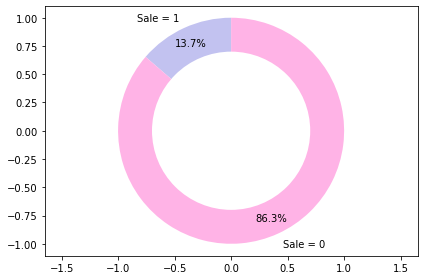

In [42]:
number_of_sale =  np.count_nonzero(df.Sale.values)
number_of_not_sale = np.size(df['Sale'])-number_of_sale
sizes = (number_of_sale, number_of_not_sale)
explode = (0, 0.1)
colors =['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
fig1, ax1 = plt.subplots()
status = 'Sale = 1', 'Sale = 0'
ax1.pie(sizes, labels=status, autopct='%1.1f%%', colors=colors, frame=True , startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [43]:
def hist_plot(column):
  fig, ax = plt.subplots(figsize=(15,8))
  sns.distplot(ax = ax,a = sale[column],hist=True, kde=True, rug=False , label = 'sale')
  sns.distplot(ax = ax ,a = not_sale[column],hist=True, kde=True, rug=False,label = 'not_sale')
  plt.legend()
  plt.show()

In [44]:
numerical_columns = ['SalesAmountInEuro', 'time_delay_for_conversion',
       'nb_clicks_1week', 'product_price']
numeric_data_mapping = dict() # [upper bound , lowe bound , upper fill , lower fill , null fill]
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0                NaN                        NaN  2020-08-04 04:07:56   
1   0.0                NaN                        NaN  2020-08-04 01:47:40   
2   0.0                NaN                        NaN  2020-08-04 16:54:31   
3   0.0                NaN                        NaN  2020-08-03 20:34:28   
4   0.0                NaN                        NaN  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              NaN            NaN                 0           3           0   
1              NaN            NaN                 0           3           0   
2              NaN            NaN                 1           1           0   
3              NaN            NaN                 0           2           0   
4           1064.0            NaN                 1           3           0   

  product_gender  ... partner_id user_id     pc time_delay SalesAmount  \
0              0  ...        183   96766  False      False       False   
1              0  ...        183       1  False      False       False   
2              1  ...          1       2  False      False       False   
3              0  ...        183       3  False      False       False   
4              2  ...          2       4  False      False       False   

          day  day_time  day_time_category tree_encode category_encode  
0  2020-08-04  04:07:56                  5           6              63  
1  2020-08-04  01:47:40                  2           6              63  
2  2020-08-04  16:54:31                 17          12              63  
3  2020-08-03  20:34:28                 21           6              63  
4  2020-08-03  20:54:17                 21          18              63  

[5 rows x 31 columns]

In [45]:
def histogramX(col):
    fig = plt.figure(figsize=(20,10))
    sns.boxplot(data=pd.DataFrame(data = {"col":col}),x = "col")
    plt.show()
    fig = plt.figure(figsize=(20,10))
    sns.distplot(col, hist=True, kde=True, 
             bins=int(20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

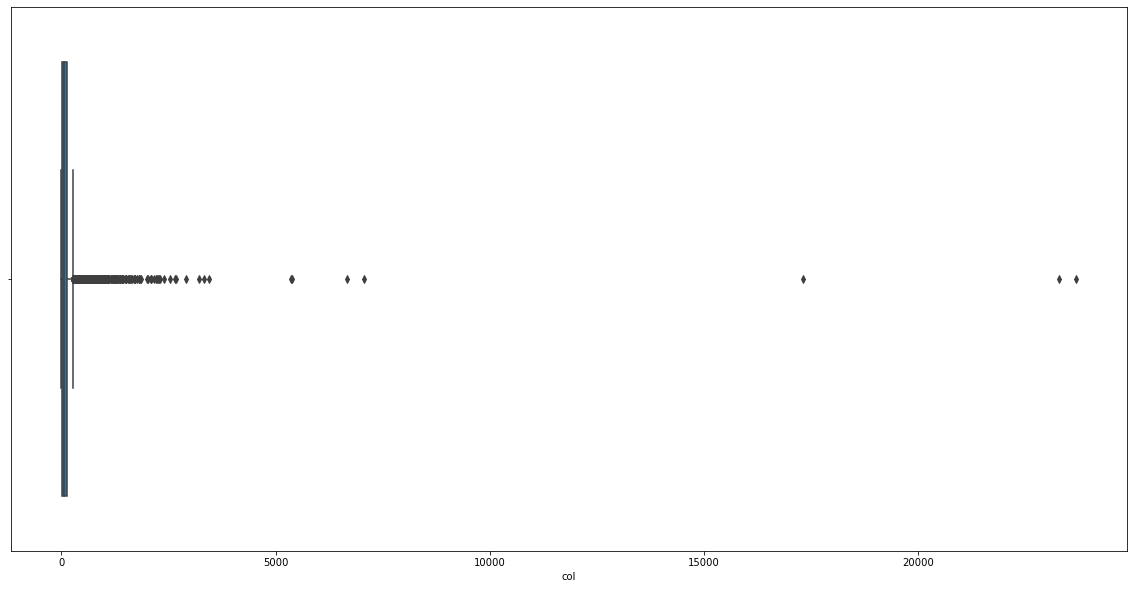

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



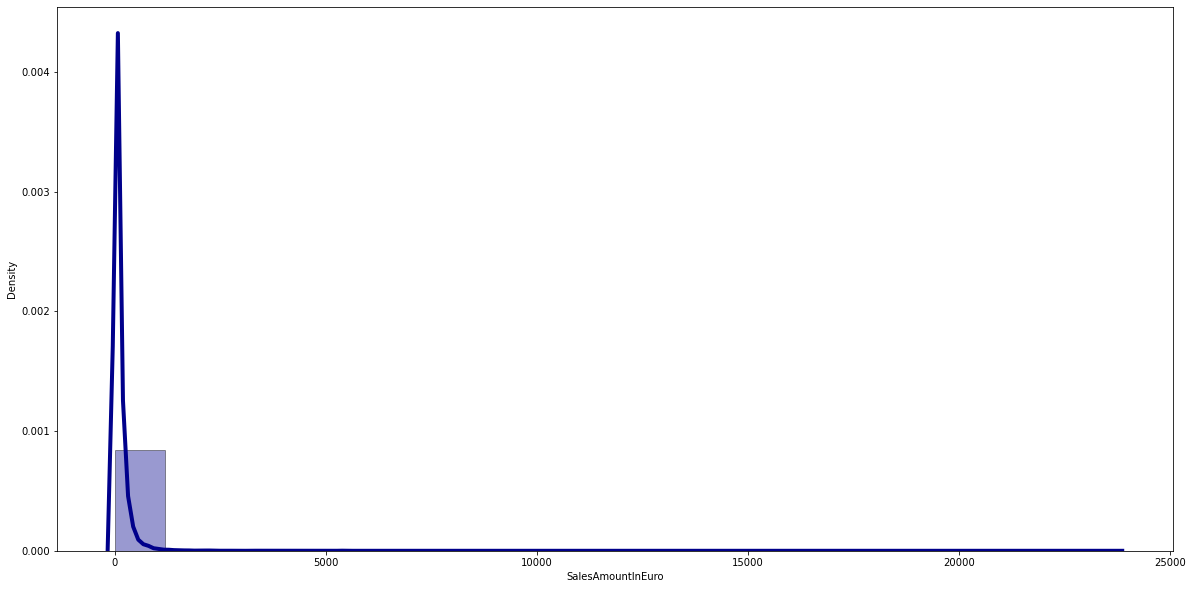

In [46]:
col = df["SalesAmountInEuro"]
histogramX(col)

In [47]:
mean = col.mean()
col = col.fillna(mean)
upper = col.quantile(0.95)
lower = col.quantile(0.05)
col = col.apply(lambda x : mean if (x >upper) else lower if (x < lower) else x )
print(col.describe()) # [upper bound , lowe bound , upper fill , lower fill , null fill]
df["SalesAmountInEuro"] = col
numeric_data_mapping["SalesAmountInEuro"]  = [upper,lower,mean,lower,mean,col.mean(),col.std()]

count    100000.000000
mean        110.283285
std          21.461598
min          33.800000
25%         117.030507
50%         117.030507
75%         117.030507
max         117.030507
Name: SalesAmountInEuro, dtype: float64


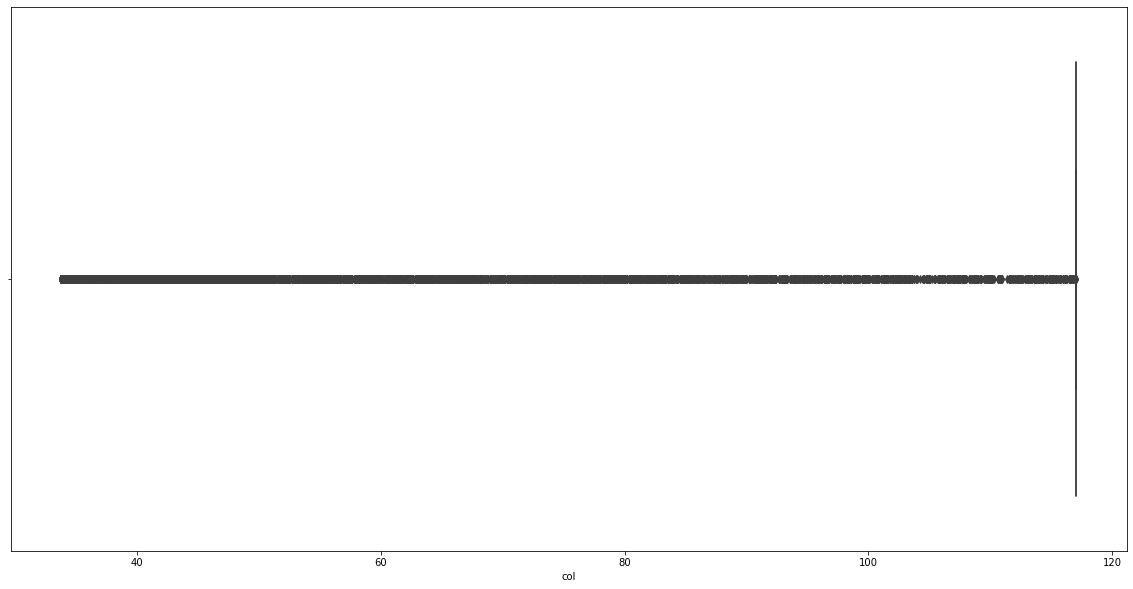

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



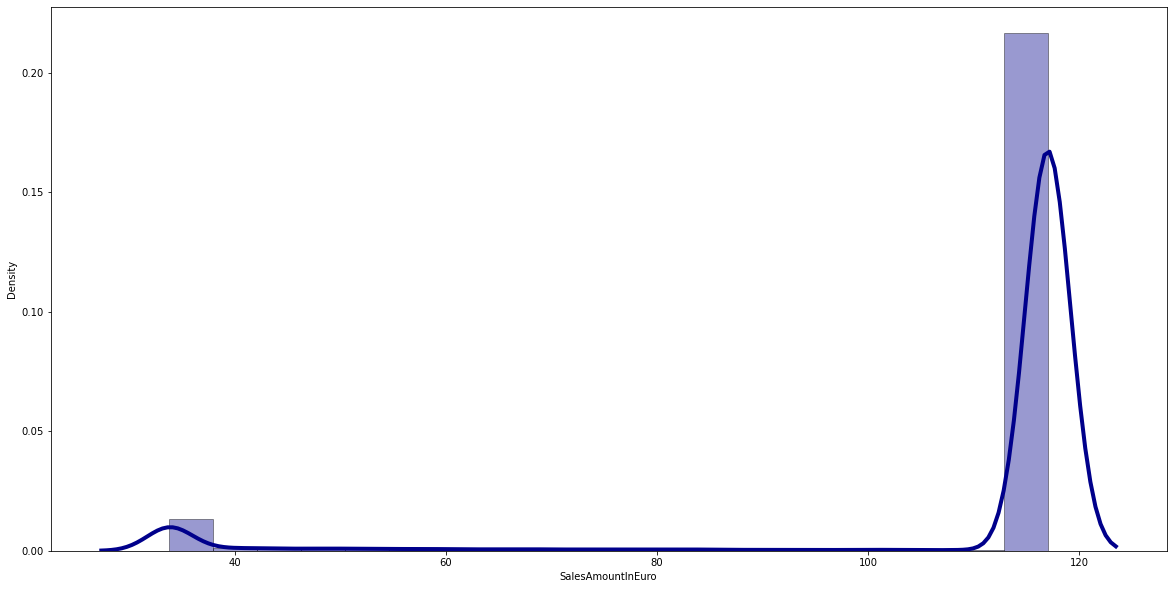

In [48]:
histogramX(col)

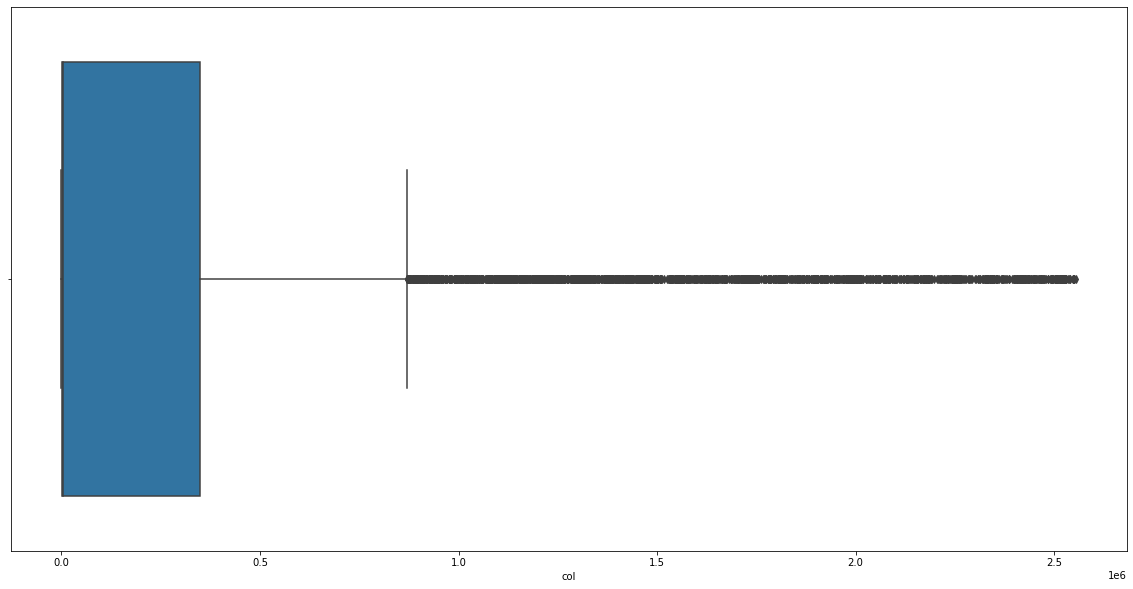

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



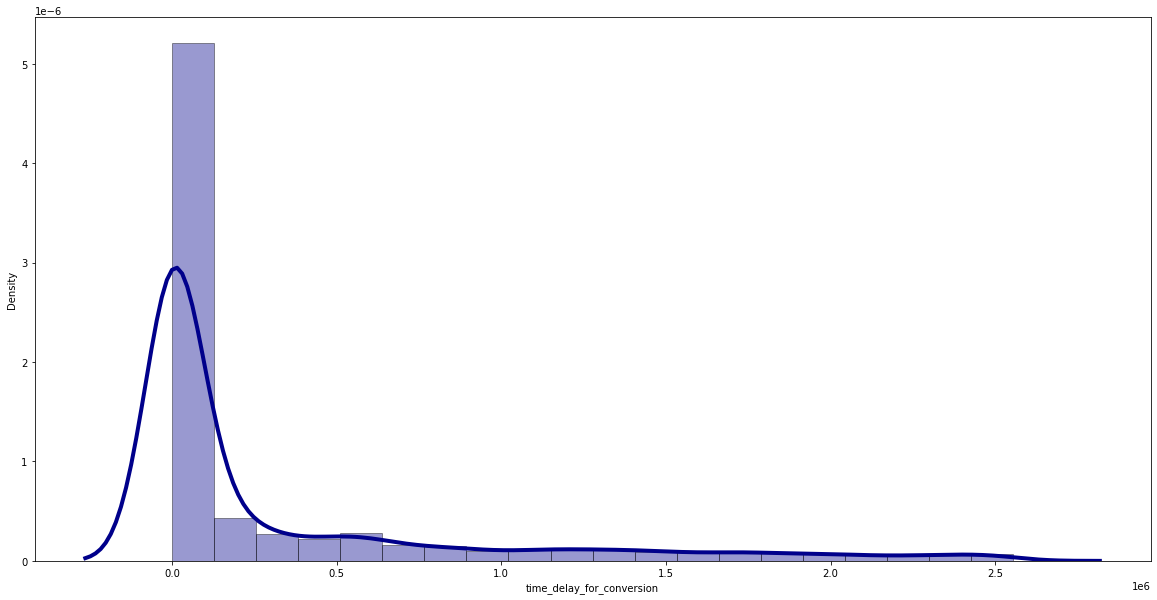

In [49]:
col = df["time_delay_for_conversion"]
histogramX(col)

In [50]:
mean = col.mean()
col = col.fillna(mean)
upper = col.quantile(0.95)
lower = col.quantile(0.05)
col = col.apply(lambda x : mean if (x >upper) else lower if (x < lower) else x )
print(col.describe()) # [upper bound , lowe bound , upper fill , lower fill , null fill]
df["time_delay_for_conversion"] = col
numeric_data_mapping["time_delay_for_conversion"] =  [upper,lower,mean,lower,mean,col.mean(),col.std()]

count    100000.000000
mean     292300.154621
std       89423.784977
min        1285.000000
25%      321366.648611
50%      321366.648611
75%      321366.648611
max      321366.648611
Name: time_delay_for_conversion, dtype: float64


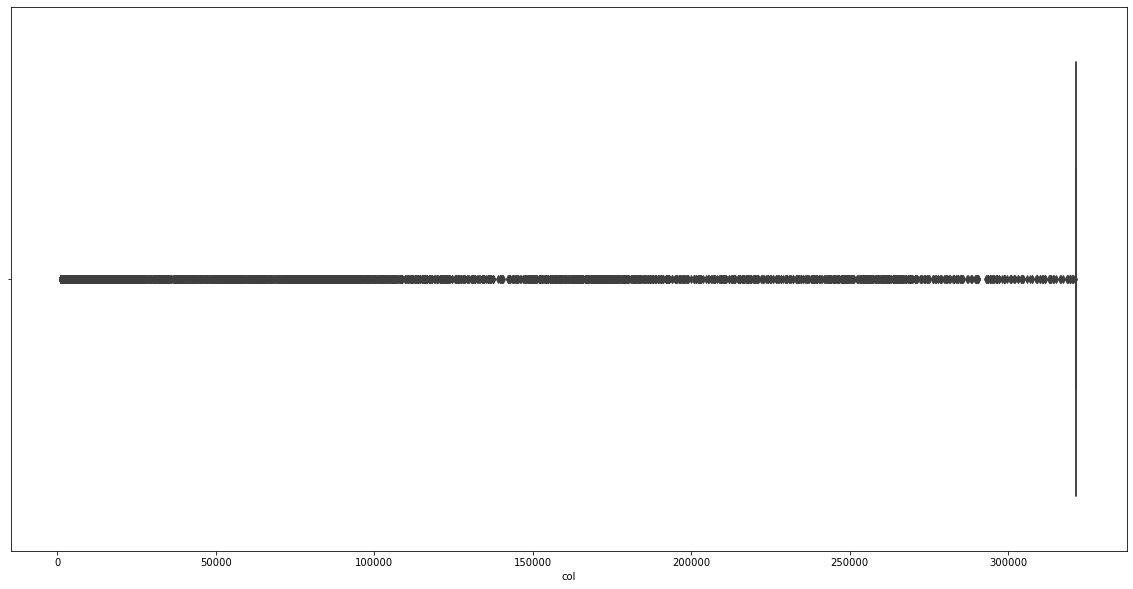

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



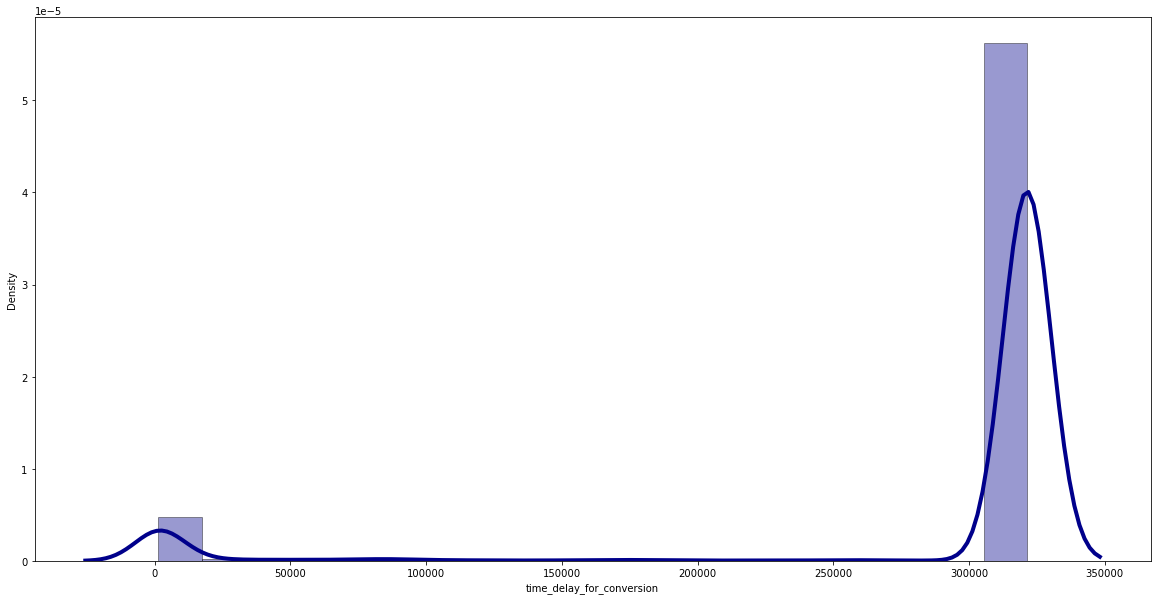

In [51]:
histogramX(col)

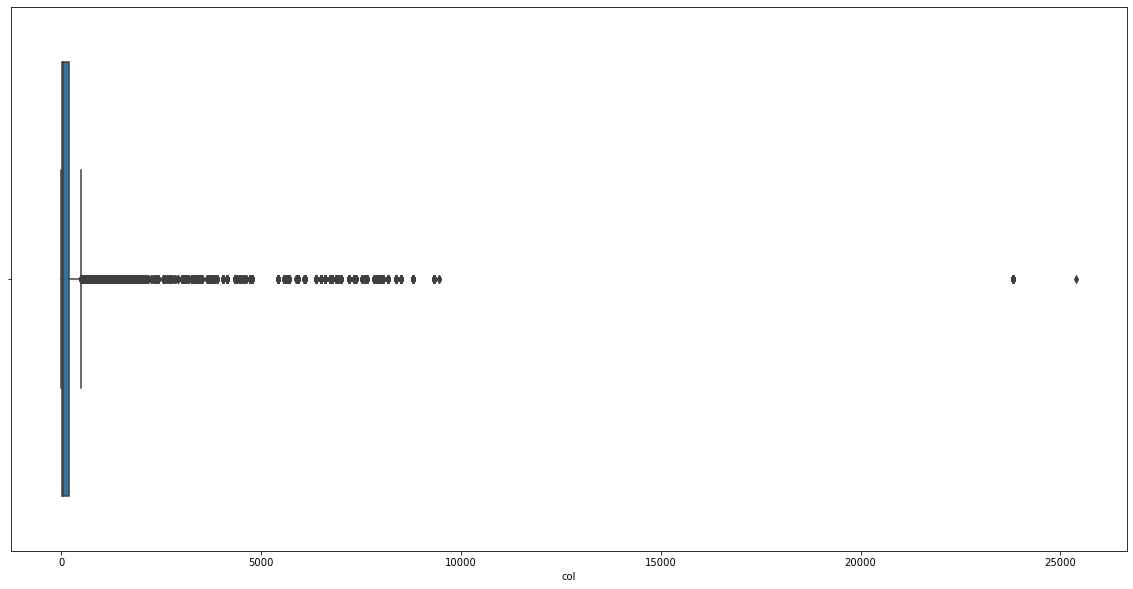

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



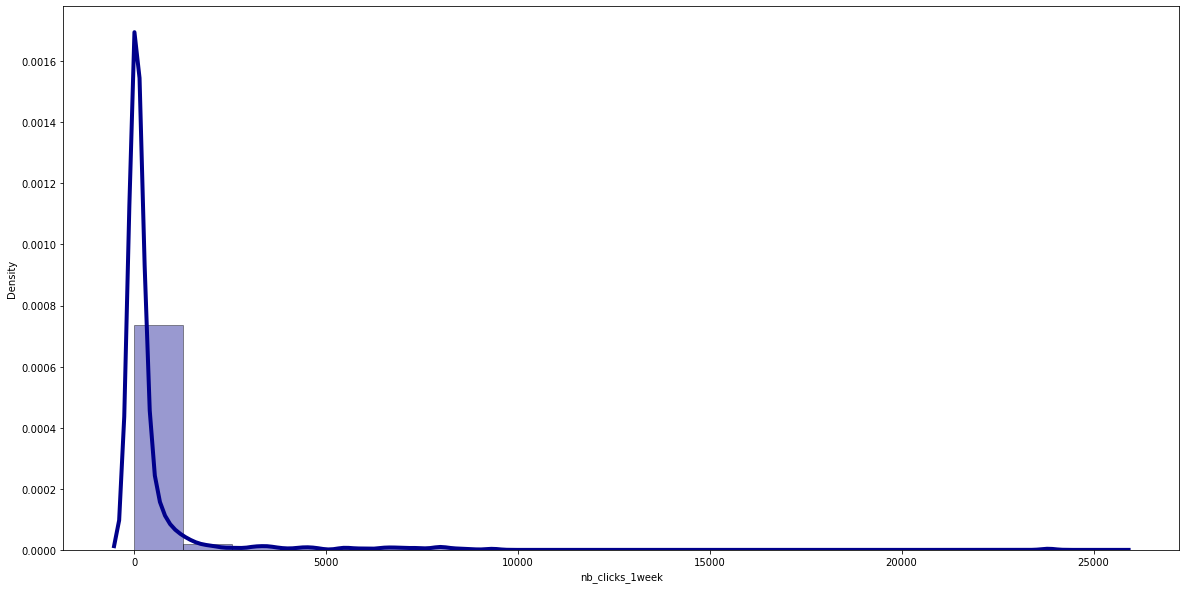

In [52]:
col = df["nb_clicks_1week"]
histogramX(col)

In [53]:
col = df["nb_clicks_1week"] 
maxim = col.max()
minim = col.min()
col = col.fillna(-1)
col
n_cat = 16
cat_list = []
for i in range(n_cat):
    cat_list.append((maxim-minim)/n_cat * i + minim)
def f(x,l):
    size = len(l)
    if x < l[0]:
        return 0
    i = 1
    for ind in l:
        if ind > x:
            return i
        i+=1
    return i
col = col.apply(lambda x : f(x,cat_list))
df["nb_clicks_1week_category"] = col 
pie_plot('nb_clicks_1week_category',df)
nb_clicks_1week_category = dict()
nb_clicks_1week_category["nb_clicks_1week_category"] = [minim,maxim,n_cat,-1]

In [54]:
mean = col.mean()
col = col.fillna(mean)
upper = col.quantile(0.95)
lower = col.quantile(0.05)
col = col.apply(lambda x : mean if (x >upper) else lower if (x < lower) else x )
print(col.describe()) # [upper bound , lowe bound , upper fill , lower fill , null fill, meanfill,stdfill]
df["nb_clicks_1week"] = col
numeric_data_mapping["nb_clicks_1week"] = [upper,lower,mean,lower,mean,col.mean(),col.std()]

count    100000.000000
mean          1.053578
std           0.983709
min           0.000000
25%           0.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: nb_clicks_1week, dtype: float64


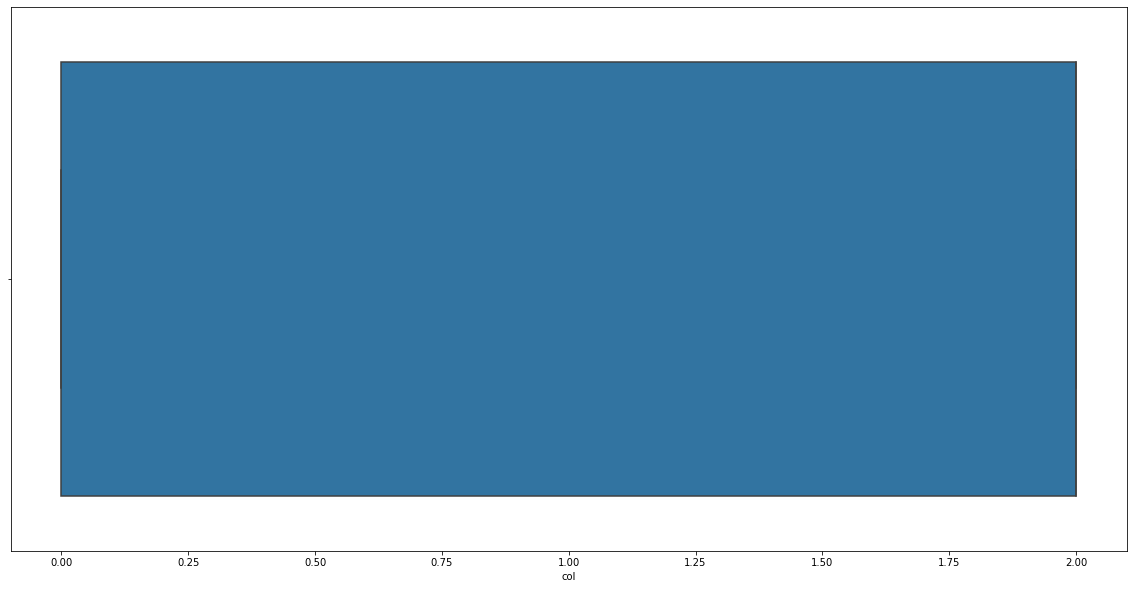

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



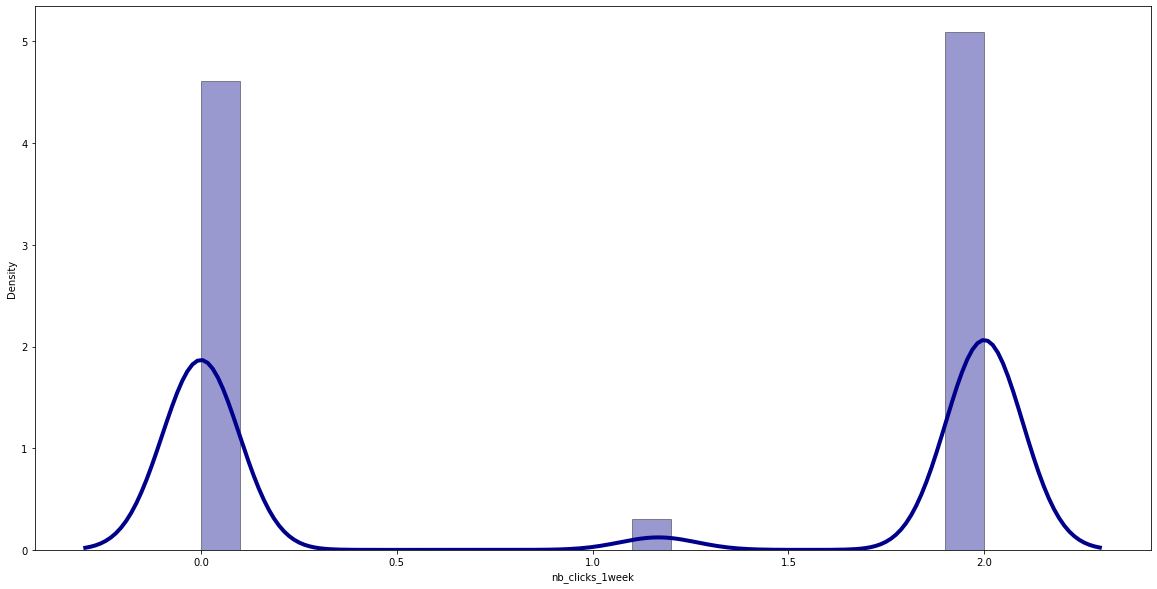

In [55]:
histogramX(col)

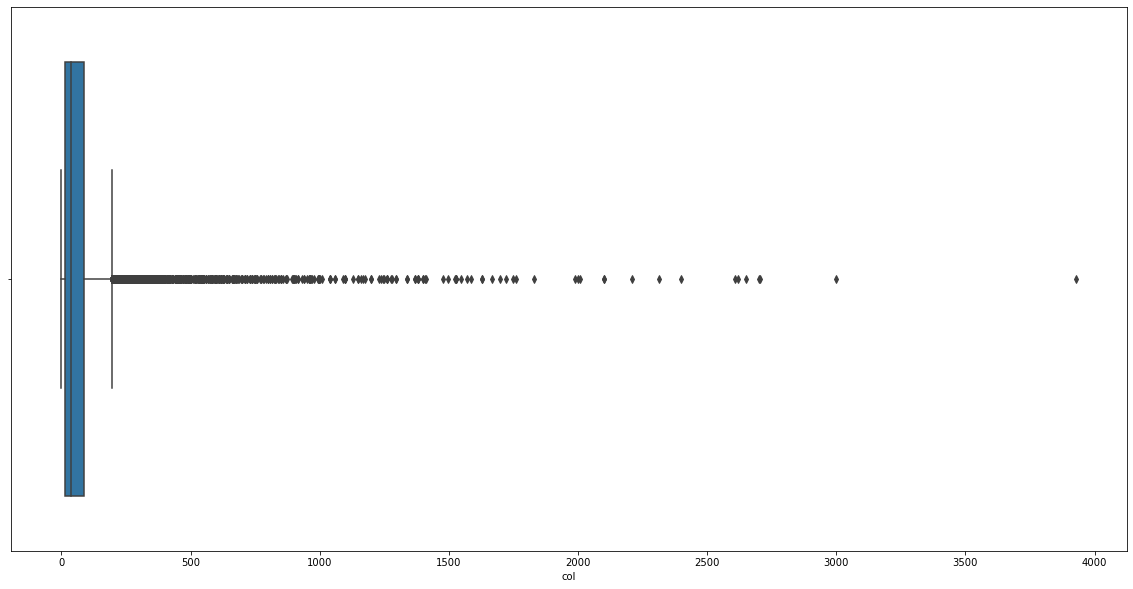

/home/amirhoosein/anaconda3/envs/generalAI/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



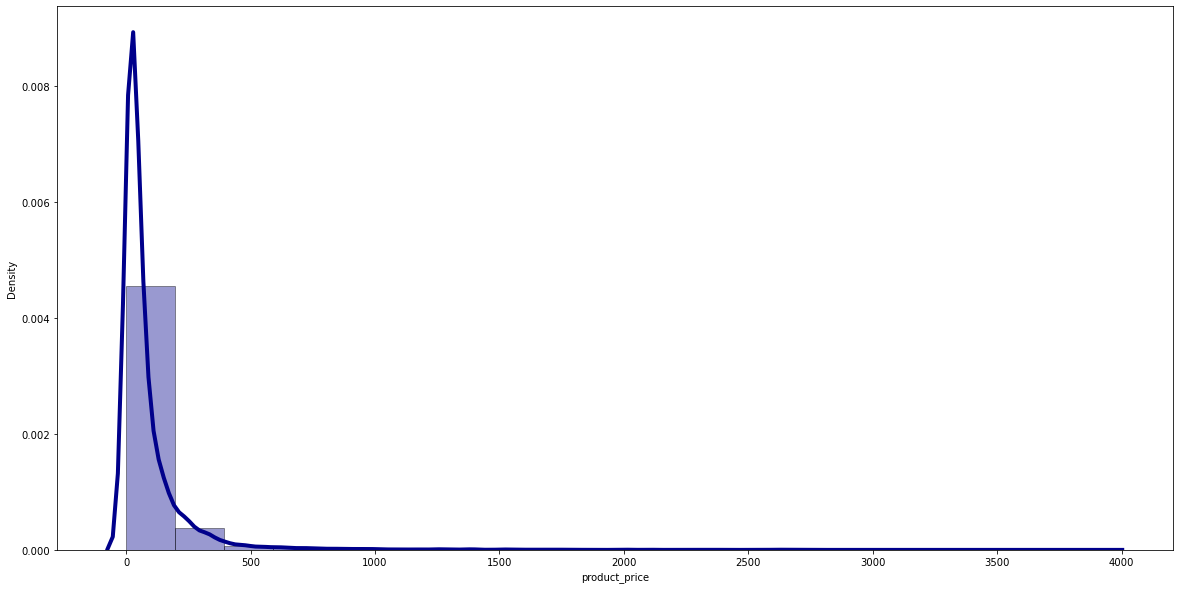

In [56]:
col = df["product_price"]
histogramX(col)

In [57]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0         117.030507              321366.648611  2020-08-04 04:07:56   
1   0.0         117.030507              321366.648611  2020-08-04 01:47:40   
2   0.0         117.030507              321366.648611  2020-08-04 16:54:31   
3   0.0         117.030507              321366.648611  2020-08-03 20:34:28   
4   0.0         117.030507              321366.648611  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              0.0            NaN                 0           3           0   
1              0.0            NaN                 0           3           0   
2              0.0            NaN                 1           1           0   
3              0.0            NaN                 0           2           0   
4              2.0            NaN                 1           3           0   

  product_gender  ... user_id     pc time_delay SalesAmount         day  \
0              0  ...   96766  False      False       False  2020-08-04   
1              0  ...       1  False      False       False  2020-08-04   
2              1  ...       2  False      False       False  2020-08-04   
3              0  ...       3  False      False       False  2020-08-03   
4              2  ...       4  False      False       False  2020-08-03   

   day_time day_time_category  tree_encode category_encode  \
0  04:07:56                 5            6              63   
1  01:47:40                 2            6              63   
2  16:54:31                17           12              63   
3  20:34:28                21            6              63   
4  20:54:17                21           18              63   

  nb_clicks_1week_category  
0                        0  
1                        0  
2                        0  
3                        0  
4                        2  

[5 rows x 32 columns]

In [58]:
col = df["product_price"] 
n_cat = 8
cat_list = []
for i in range(n_cat):
    cat_list.append((col.max()-col.min())/n_cat * i + col.min())
def f(x,l):
    size = len(l)
    if x < l[0]:
        return 0
    i = 1
    for ind in l:
        if ind > x:
            return i
        i+=1
    return i
col = col.fillna(0)
col = col.apply(lambda x : f(x,cat_list))
df["product_price_category"] = col 
df.head()
pie_plot('product_price_category',df)

In [59]:
col = df["product_price"] 
mean = col.mean()
col = col.fillna(mean)
upper = col.quantile(0.95)
lower = col.quantile(0.05)
col = col.apply(lambda x : mean if (x >upper) else lower if (x < lower) else x )
print(col.describe()) # [upper bound , lowe bound , upper fill , lower fill , null fill]
numeric_data_mapping["product_price"] = [upper,lower,mean,lower,mean]
df["product_price"] = col

count    100000.000000
mean         80.794055
std          15.371115
min          25.000000
25%          85.491137
50%          85.491137
75%          85.491137
max          85.491137
Name: product_price, dtype: float64


In [60]:
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0         117.030507              321366.648611  2020-08-04 04:07:56   
1   0.0         117.030507              321366.648611  2020-08-04 01:47:40   
2   0.0         117.030507              321366.648611  2020-08-04 16:54:31   
3   0.0         117.030507              321366.648611  2020-08-03 20:34:28   
4   0.0         117.030507              321366.648611  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              0.0      85.491137                 0           3           0   
1              0.0      85.491137                 0           3           0   
2              0.0      85.491137                 1           1           0   
3              0.0      85.491137                 0           2           0   
4              2.0      85.491137                 1           3           0   

  product_gender  ...     pc time_delay SalesAmount         day  day_time  \
0              0  ...  False      False       False  2020-08-04  04:07:56   
1              0  ...  False      False       False  2020-08-04  01:47:40   
2              1  ...  False      False       False  2020-08-04  16:54:31   
3              0  ...  False      False       False  2020-08-03  20:34:28   
4              2  ...  False      False       False  2020-08-03  20:54:17   

  day_time_category tree_encode  category_encode nb_clicks_1week_category  \
0                 5           6               63                        0   
1                 2           6               63                        0   
2                17          12               63                        0   
3                21           6               63                        0   
4                21          18               63                        2   

  product_price_category  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 33 columns]

<AxesSubplot:>

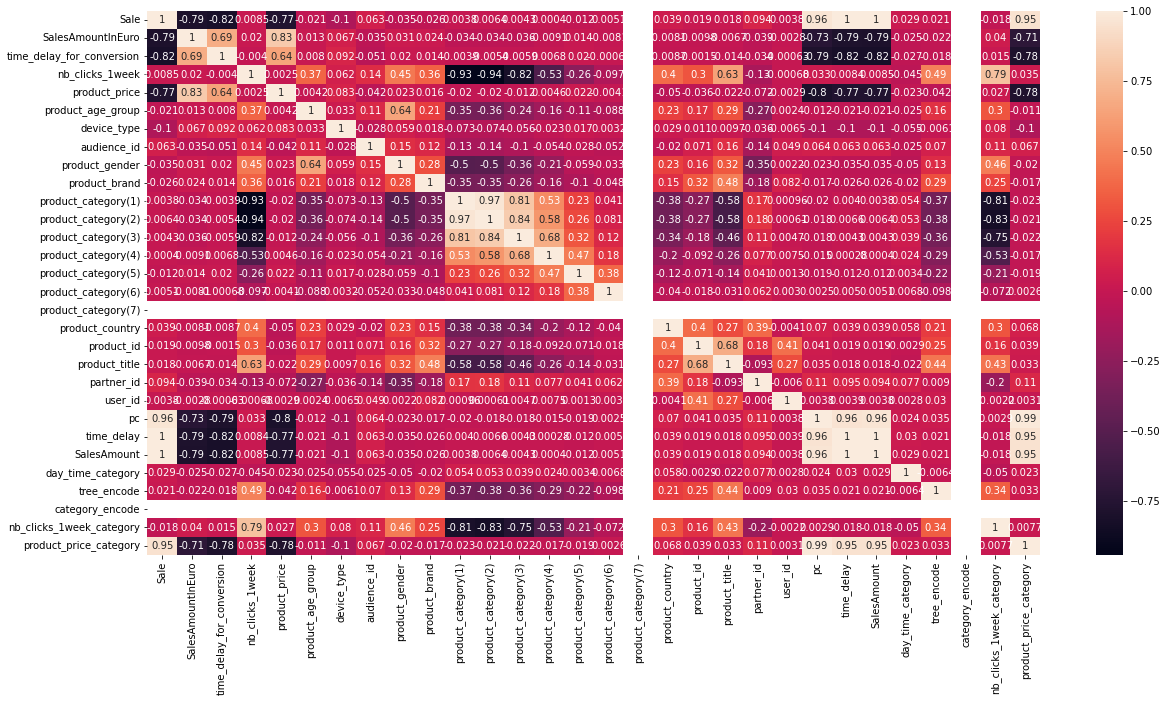

In [61]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.drop(columns = ["day","day_time","click_timestamp"]).astype(float).corr(),annot=True)

In [62]:
pie_plot('product_price_category',df)

In [63]:
df = df.drop(columns = ["pc","product_category(7)","SalesAmount","time_delay"])
df.head()

Sale  SalesAmountInEuro  time_delay_for_conversion      click_timestamp  \
0   0.0         117.030507              321366.648611  2020-08-04 04:07:56   
1   0.0         117.030507              321366.648611  2020-08-04 01:47:40   
2   0.0         117.030507              321366.648611  2020-08-04 16:54:31   
3   0.0         117.030507              321366.648611  2020-08-03 20:34:28   
4   0.0         117.030507              321366.648611  2020-08-03 20:54:17   

   nb_clicks_1week  product_price product_age_group device_type audience_id  \
0              0.0      85.491137                 0           3           0   
1              0.0      85.491137                 0           3           0   
2              0.0      85.491137                 1           1           0   
3              0.0      85.491137                 0           2           0   
4              2.0      85.491137                 1           3           0   

  product_gender  ... product_title partner_id user_id         day  day_time  \
0              0  ...             0        183   96766  2020-08-04  04:07:56   
1              0  ...             0        183       1  2020-08-04  01:47:40   
2              1  ...             1          1       2  2020-08-04  16:54:31   
3              0  ...             0        183       3  2020-08-03  20:34:28   
4              2  ...             2          2       4  2020-08-03  20:54:17   

  day_time_category tree_encode category_encode nb_clicks_1week_category  \
0                 5           6              63                        0   
1                 2           6              63                        0   
2                17          12              63                        0   
3                21           6              63                        0   
4                21          18              63                        2   

  product_price_category  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 29 columns]

In [64]:
df.to_csv('datasets/EDA.csv')
json.dump( mapping_dict, open( "utils/mapping.json", 'w' ) )
json.dump( numeric_data_mapping, open( "utils/numeric_data_mapping.json", 'w' ) )
json.dump( nb_clicks_1week_category, open( "utils/nb_clicks_1week_category.json", 'w' ) )

In [65]:
col = df["product_price_category"]
col2 = col > 0
col2 = col2.astype(int)
s = df["Sale"] == col2
sum(s)/len(s)

0.99123